In [7]:
import numpy as np

path = "/home/minhpr/MNHT/bev3d-fb-ssem/masks/unity_data/bev_mask.npy"

data = np.load(path)
print(data.shape)
# print the last dimension data 
print(data[0,0,0,:])
# type(data)
print(data.dtype)
# show min and max value
print("Min value: ", np.min(data))
print("Max value: ", np.max(data))


(4, 1, 360000, 3)
[ True  True  True]
bool
Min value:  False
Max value:  True


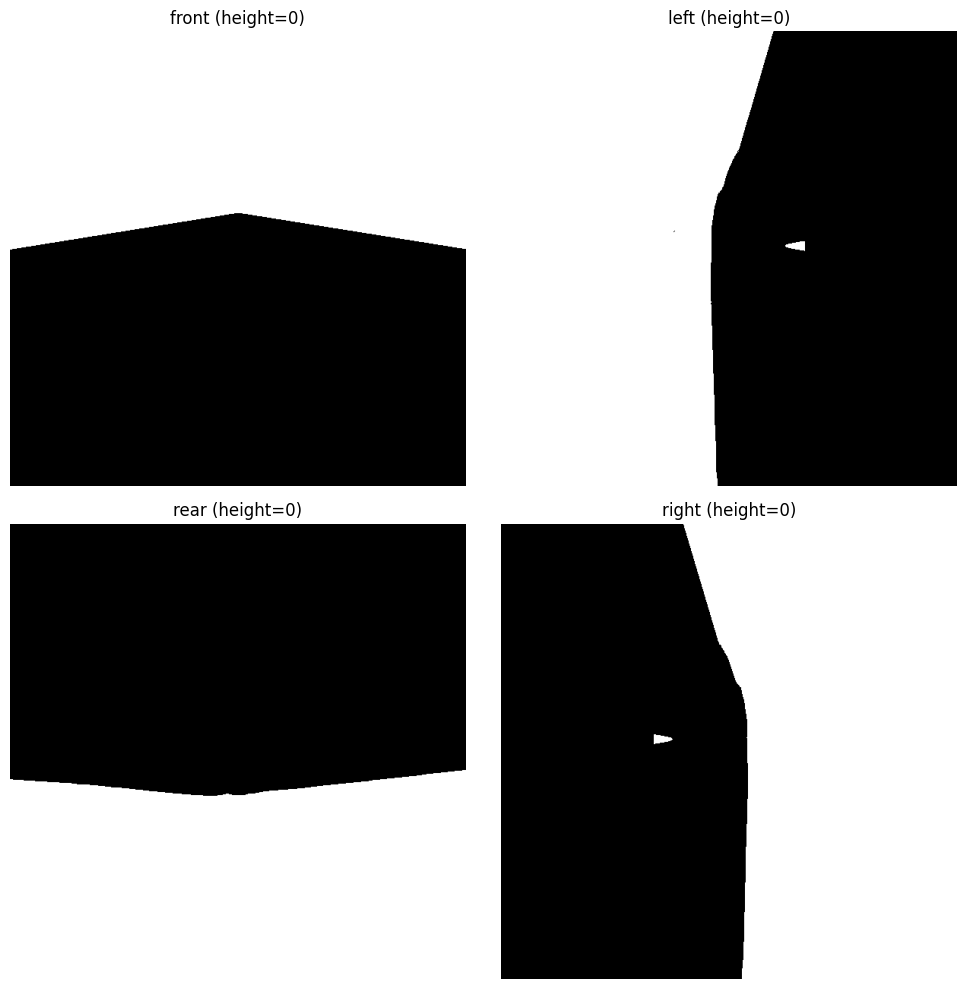

In [23]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("/home/minhpr/MNHT/bev3d-fb-ssem/masks/unity_data/bev_mask.npy")

cam_names = ["front", "left", "rear", "right"]
H = W = 600          # vì 3600 = 60×60
height_id = 0       # chọn height thấp nhất

plt.figure(figsize=(10, 10))

for cam_id, cam_name in enumerate(cam_names):
    bev_mask = data[cam_id, 0, :, height_id].reshape(H, W)

    plt.subplot(2, 2, cam_id + 1)
    plt.imshow(bev_mask, cmap="gray")
    plt.title(f"{cam_name} (height={height_id})")
    plt.axis("off")

plt.tight_layout()
plt.show()


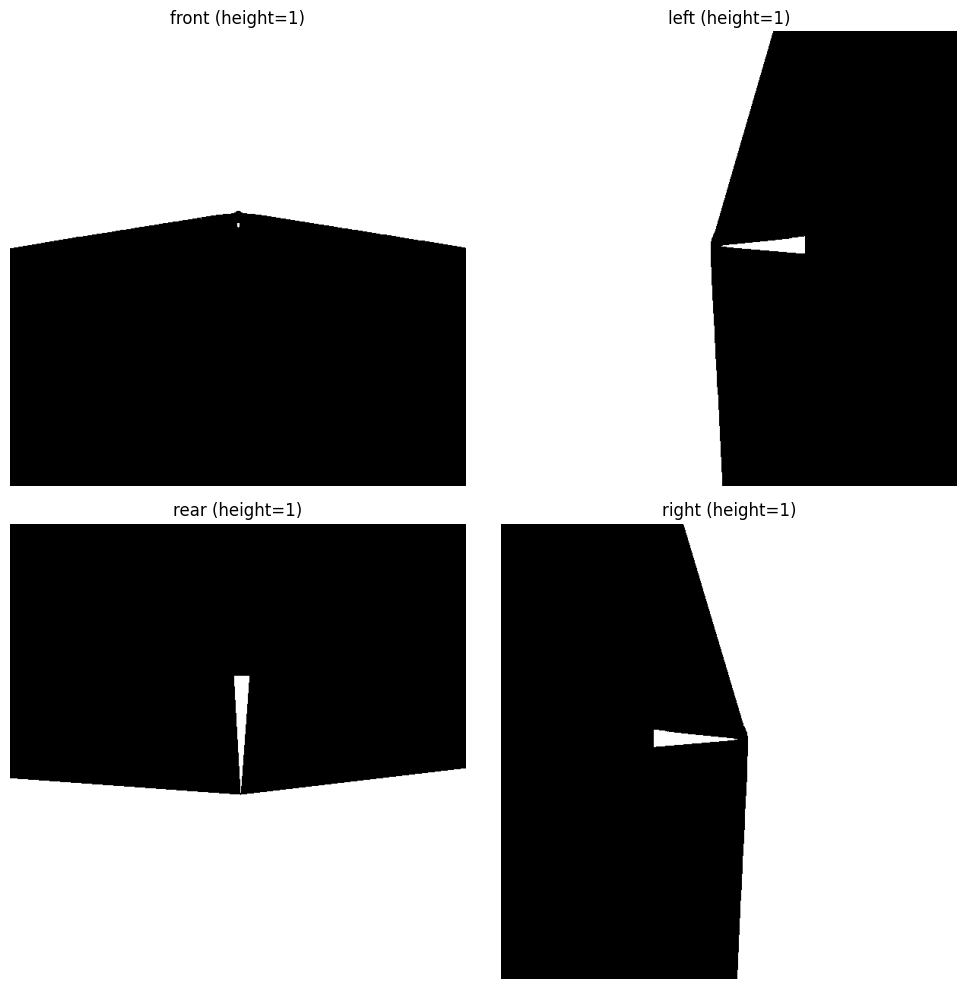

In [25]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("/home/minhpr/MNHT/bev3d-fb-ssem/masks/unity_data/bev_mask.npy")

cam_names = ["front", "left", "rear", "right"]
H = W = 600          # vì 3600 = 60×60
height_id = 1       # chọn height thấp nhất

plt.figure(figsize=(10, 10))

for cam_id, cam_name in enumerate(cam_names):
    bev_mask = data[cam_id, 0, :, height_id].reshape(H, W)

    plt.subplot(2, 2, cam_id + 1)
    plt.imshow(bev_mask, cmap="gray")
    plt.title(f"{cam_name} (height={height_id})")
    plt.axis("off")

plt.tight_layout()
plt.show()


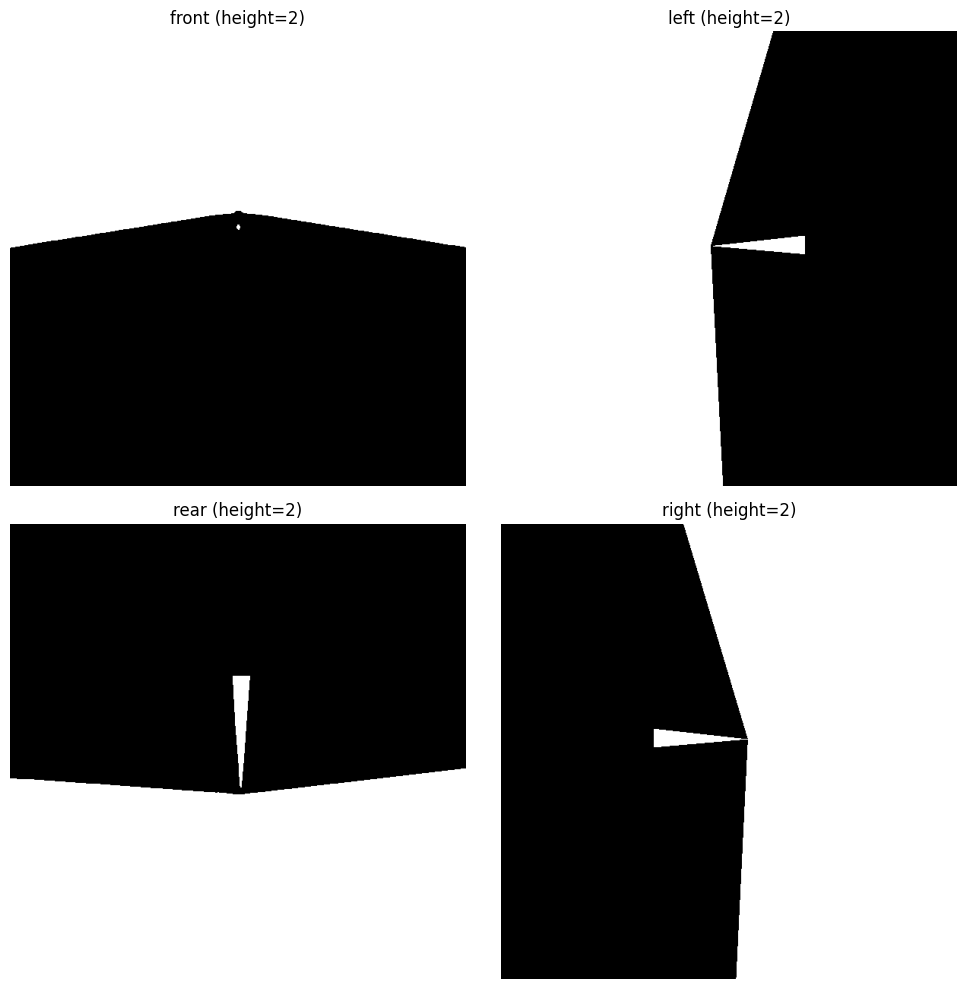

In [24]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("/home/minhpr/MNHT/bev3d-fb-ssem/masks/unity_data/bev_mask.npy")

cam_names = ["front", "left", "rear", "right"]
H = W = 600          # vì 3600 = 60×60
height_id = 2       # chọn height thấp nhất

plt.figure(figsize=(10, 10))

for cam_id, cam_name in enumerate(cam_names):
    bev_mask = data[cam_id, 0, :, height_id].reshape(H, W)

    plt.subplot(2, 2, cam_id + 1)
    plt.imshow(bev_mask, cmap="gray")
    plt.title(f"{cam_name} (height={height_id})")
    plt.axis("off")

plt.tight_layout()
plt.show()


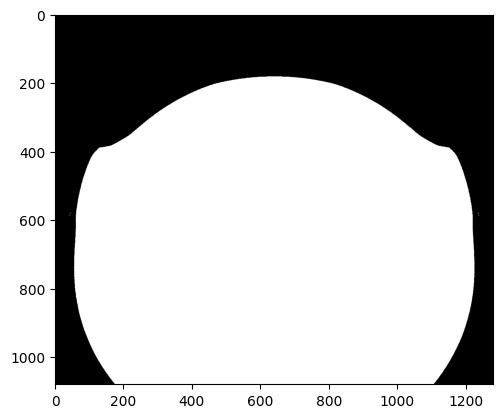

In [7]:
mask = np.load("/home/minhpr/MNHT/bev3d-fb-ssem/masks/forward_looking_camera_model/masks/front.npy")
import matplotlib.pyplot as plt
plt.imshow(mask,cmap= "gray")
plt.show()

(1080, 1280, 3)
[[329.12189796 480.13109952]
 [335.25257565 478.79245851]
 [341.72911257 477.4165724 ]
 [348.57561829 476.00412399]
 [355.8175994  474.55627504]
 [363.48187844 473.07476448]
 [371.59644891 471.56201995]
 [380.19024816 470.02128252]
 [389.292827   468.45674331]
 [398.93389206 466.8736897 ]
 [409.14269553 465.27865633]
 [419.94724662 463.6795739 ]
 [431.3733225  462.08590551]
 [443.44326312 460.50875661]
 [456.17454788 458.96094057]
 [469.57817199 457.45697861]
 [483.65686878 456.01300989]
 [498.40326045 454.64658762]
 [513.79806081 453.37634017]
 [529.80849484 452.22148422]
 [546.38713274 451.20119091]
 [563.47134916 450.33382463]
 [580.98360141 449.63609663]
 [598.83266464 449.12219778]
 [616.91586779 448.80299109]
 [635.12225115 448.68535086]
 [653.33643629 448.77172672]
 [671.44288866 449.05998722]
 [689.33018963 449.54356326]
 [706.89493354 450.21187226]
 [724.04492693 451.0509695 ]
 [740.70147597 452.04434881]
 [756.80067758 453.17380637]
 [772.29375312 454.42028642

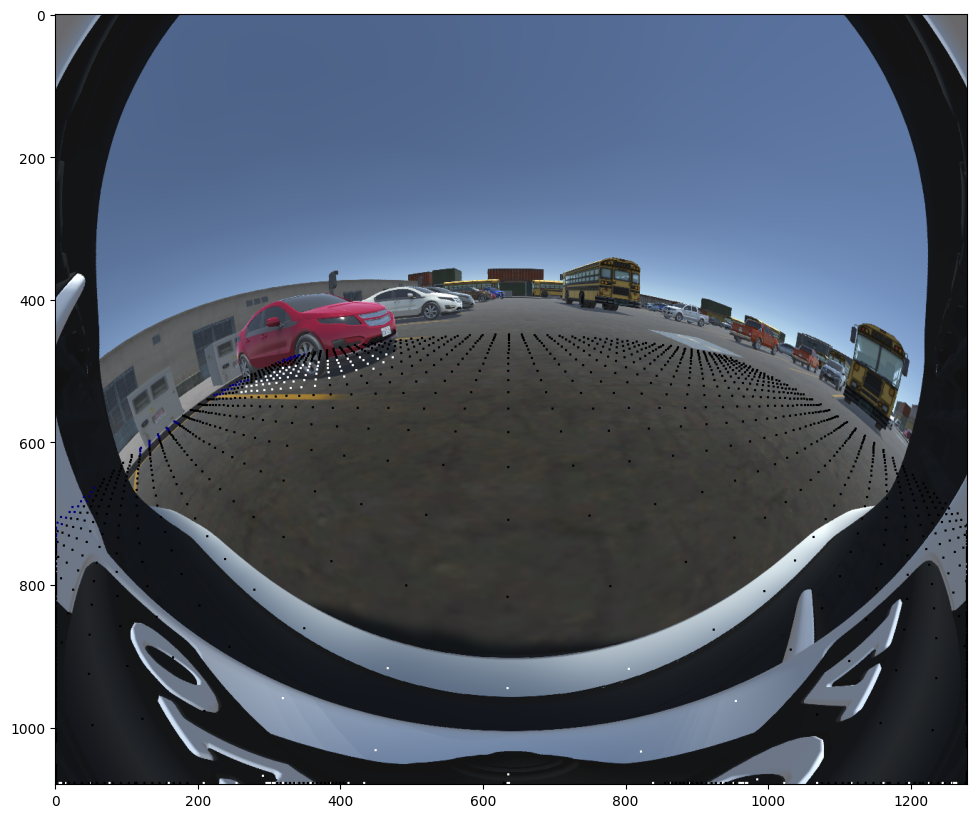

In [6]:
# visualize the 
import matplotlib.pyplot as plt
import cv2
# binary mask
front_img = "/home/minhpr/MNHT/FB-SSEM-dataset/F2BEV_code/F2BEV/pre_computation/forward_looking_camera_model/data/front/0.png"
seg_bev_img = "/home/minhpr/MNHT/FB-SSEM-dataset/F2BEV_code/F2BEV/pre_computation/forward_looking_camera_model/data/seg/BEV_0_seg.png"
front = cv2.imread(front_img)
seg_bev = cv2.imread(seg_bev_img)[100:500,100:500,:]
front = cv2.cvtColor(front, cv2.COLOR_BGR2RGB)
seg_bev = cv2.cvtColor(seg_bev, cv2.COLOR_BGR2RGB)
print(front.shape)
# plt.imshow(front)
data[...,0] =np.clip(data[...,0]*front.shape[1],0,front.shape[1]-3)
data[...,1] = np.clip(data[...,1]*front.shape[0],0,front.shape[0]-3)
print(data[0,0,:100,0,:])
output = front.copy()

bev_h = 400 #height of the Unity generated bev i consider (if i crop then consider cropped size)
bev_w = 400 #width of the Unity generated bev i consider (if i crop then consider  cropped size)

bh = 50
bw = 50
bev_scale = int(bev_h/bh) ##600/50
bevformer_bev_size = (bh,bw)
bev_seg = cv2.resize(seg_bev, (bw, bh), interpolation=cv2.INTER_NEAREST)

idx = data[0,0,:,0,:].reshape(50,50,2)[:,:,::-1].astype(np.int32)  # x,y to y,x
print(idx.shape)
print(bev_seg.shape)
output[(idx[:,:,0].reshape(50,50,1) + np.array([0,1,2])).reshape(50,50,3,1), idx[:,:,1].reshape(50,50,1,1) + np.array([0,1,2]), :] = bev_seg.reshape(50,50,1,1,3)
# output[idx[:,:,0]+1, idx[:,:,1], :] = bev_seg
# output[idx[:,:,0]+2, idx[:,:,1], :] = bev_seg
# output[idx[:,:,0], idx[:,:,1]+1, :] = bev_seg
# output[idx[:,:,0], idx[:,:,1]+2, :] = bev_seg
# output[idx[:,:,0], idx[:,:,1]+3, :] = bev_seg


plt.figure(figsize=(12,10))
plt.imshow(output)
plt.show()

In [52]:
from pprint import pprint

temp = front_mask[0,0,:,0,0].reshape(50, 50)
for i in range(temp.shape[0]):
    for j in range(temp.shape[1]):
        print(temp[i,j], end=' ')
    print()


0.25712648277799066 0.26191607473006284 0.2669758691988367 0.2723247017879643 0.27798249953073256 0.2839702175329642 0.29030972571041114 0.2970236313750535 0.3041350210909828 0.311667103172556 0.3196427308799182 0.32808378642497094 0.3370104082048987 0.34644004931205774 0.3563863655328446 0.36685794686549 0.37785692873216964 0.3893775472283372 0.40140473500789237 0.41391288659508724 0.4268649474514749 0.4402119915284045 0.45389343859952974 0.4678380192509307 0.4819655217072663 0.4961892587083345 0.5104190908536826 0.5245647567693071 0.5385392106499303 0.5522616668242437 0.5656600991649288 0.5786730281040696 0.591250529356604 0.6033544946248145 0.6149582489682833 0.6260456739288749 0.6366099999719591 0.6466524223123482 0.6561806693425136 0.6652076211261726 0.6737500433782306 0.6818274742245684 0.6894612788132822 0.6966738708898607 0.7034880901171852 0.709926718122426 0.7160121137980331 0.721765948198833 0.7272090205930343 0.7323611391950127 
0.25061306629129465 0.2553036573868442 0.2602